# ANN Model and Data Sampling using Torch

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from imblearn.over_sampling import SMOTE

#### Separate X and y data

In [2]:
df = pd.read_csv('DataSets/Customer_Churn_Cleaned.csv')
df = df.drop(columns = ['Unnamed: 0'])
X = df.drop(columns = ['Churn'])
y = df['Churn'] 

#### Count data of both classes

In [3]:
cnt0 = 0
cnt1 = 0
for i in range(len(y)):
    if y[i] == 0:
         cnt0 += 1
    else:
         cnt1 += 1
cnt0,cnt1

(5174, 1869)

Data is imbalanced so,
#### Data Sampling with SMOT

In [4]:
smt = SMOTE(sampling_strategy='minority')
X,y = smt.fit_resample(X,y)

#### Convert dataframe to values and split the data

In [5]:
X = X.values
y = y.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#### Convert values to Tensors

In [6]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test) 
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(torch.Size([8278, 27]),
 torch.Size([8278]),
 torch.Size([2070, 27]),
 torch.Size([2070]))

### Define ANN Model

In [7]:
class MyModel(nn.Module):
    
    def __init__(self):
        super().__init__() 
        self.fc1    = nn.Linear(27,18)
        self.fc2    = nn.Linear(18,9)
        self.output = nn.Linear(9,2)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return F.log_softmax(x, dim=1)

clf = MyModel()

#### Set Hyper-Parameters and Back-Propagation

In [8]:
optimizer = optim.Adam(clf.parameters(),lr=0.01)
loss_function = nn.CrossEntropyLoss()
final_loss = []
Epochs = 1000
for epochs in range(Epochs):
        epochs += 1
        y_pred = clf.forward(X_train)
        loss = loss_function(y_pred,y_train)
        final_loss.append(loss)
        if epochs%100 == 0:
            print(epochs,loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

100 0.4026199281215668
200 0.37416380643844604
300 0.35896798968315125
400 0.3525930345058441
500 0.3480069935321808
600 0.34515878558158875
700 0.35477370023727417
800 0.34842294454574585
900 0.34178626537323
1000 0.34344708919525146


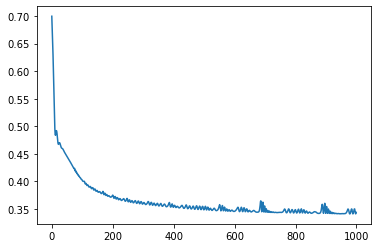

In [9]:
# loss vs epochs
plt.plot(range(Epochs),final_loss)

#### Save prediction results

In [10]:
prediction = []
for i,data in enumerate(X_test):
    y_pred = torch.argmax(clf(X_test)[i])
    prediction.append(y_pred.item())

In [11]:
truth = y_test.numpy()
predicted = np.array(prediction)

#### Calculate Accuracy

In [12]:
total = 0
correct = 0
for i in range(len(y_test)):
    if truth[i] == predicted[i]:
         correct += 1
    total += 1
    
accuracy = correct/total
np.round(accuracy,3)

0.817

#### Model Report

<AxesSubplot:>

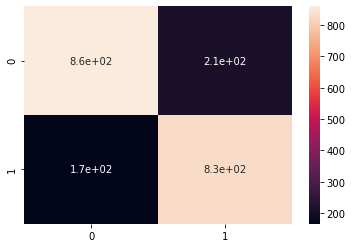

In [13]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(predicted,truth)
import seaborn as sn
sn.heatmap(cm,annot = True)

In [14]:
print(classification_report(truth,predicted))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1026
           1       0.83      0.80      0.81      1044

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

